# Experiment 2: Text Classification

## Librairies

In [1]:
import numpy as np
import torch
import pylab as pl
import pandas as pd
from keras.datasets import imdb
from src.ModelTextClassification import Net

## Data

### IMDB Dataset

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1
    return results

X_train = torch.from_numpy(vectorize_sequences(train_data)).to(torch.float32)
X_test = torch.from_numpy(vectorize_sequences(test_data)).to(torch.float32)

y_train = torch.from_numpy(np.asarray(train_labels).astype('float32'))
y_train = y_train.reshape(y_train.shape[0], 1)
y_test = torch.from_numpy(np.asarray(test_labels).astype('float32'))
y_test = y_test.reshape(y_test.shape[0], 1)

X_val = X_train[:10000]
partial_X_train = X_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

## Model : Multi-Layer Perceptron

In [4]:
list_algo = ['SGD', 'MOM', 'NAG', 'ADG', 'RMS', 'ADD', 'ADAM', 'AMS', 'NADAM', 'ADAMAX']

## Performances of the Optimization Algorithms : IMDB Dataset

In [5]:
# Some definitions
binary_cross_entropy = torch.nn.BCELoss()

nb_epochs = 50
batch_size = 120
batches_per_epoch = 100

alpha = 0.5
beta = 0.9
epsilon = 1e-8

gamma = 0.9999 # RMS Prop

rho = 0.95 # AdaDelta

alpha3 = 0.05 # RMS Prop

beta1 = 0.999   # Adam
beta2 = 0.999 # Adam
alpha1 = 0.001

alpha2 = 0.001 # AMSGrad

### Stochastic Gradient Descent (SGD)

In [6]:
model_ConvNN = Net()
L_sgd, A_sgd, lt_sgd, at_sgd = model_ConvNN.training_SGD(
    binary_cross_entropy, 
    X_train, y_train, X_test, y_test, 
    nb_epochs, batch_size, batches_per_epoch, alpha, verbose=True)
n = np.argmax(at_sgd)
lt_sgd, at_sgd = lt_sgd[n].detach().item(), at_sgd[n].detach().item()

Launching SGD training of model
Number of parameters : 160305
Epoch 1 / 50 : Loss = 0.6900794506072998
Epoch 11 / 50 : Loss = 0.17838972806930542
Epoch 21 / 50 : Loss = 0.3949306905269623
Epoch 31 / 50 : Loss = 0.1333712339401245
Epoch 41 / 50 : Loss = 0.08794180303812027
Loss test = 0.4814029633998871, Accuracy test = 0.8701599836349487


### Momentum (MOM)

In [8]:
model_ConvNN = Net()
L_mom, A_mom, lt_mom, at_mom = model_ConvNN.training_Mom(
    binary_cross_entropy, 
    X_train, y_train, X_test, y_test, 
    nb_epochs, batch_size, batches_per_epoch, alpha, beta, verbose=True)
n = np.argmax(at_mom)
lt_mom, at_mom = lt_mom[n].detach().item(), at_mom[n].detach().item()

Launching Momentum training of model 
 Number of parameters : 160305
Epoch 1 / 50 : Loss = 0.3173222839832306
Epoch 11 / 50 : Loss = 0.12376629561185837
Epoch 21 / 50 : Loss = 0.042840927839279175
Epoch 31 / 50 : Loss = 0.01532331295311451
Epoch 41 / 50 : Loss = 0.006790164392441511
Loss test = 1.2393615245819092, Accuracy test = 0.8610799908638


### Nesterov Accelerated Gradient (NAG)

In [9]:
model_ConvNN = Net()
L_nag, A_nag, lt_nag, at_nag = model_ConvNN.training_NAG(
    binary_cross_entropy, 
    X_train, y_train, X_test, y_test, 
    nb_epochs, batch_size, batches_per_epoch, alpha, beta, verbose=True)
n = np.argmax(at_nag)
lt_nag, at_nag = lt_nag[n].detach().item(), at_nag[n].detach().item()

Launching NAG training of model 
 Number of parameters : 160305
Epoch 1 / 50 : Loss = 0.31464990973472595
Epoch 11 / 50 : Loss = 0.1105373278260231
Epoch 21 / 50 : Loss = 0.039052803069353104
Epoch 31 / 50 : Loss = 0.02104880101978779
Epoch 41 / 50 : Loss = 0.0036247943062335253
Loss test = 1.6940187215805054, Accuracy test = 0.8620399832725525


### AdaGrad

In [10]:
model_ConvNN = Net()
L_adg, A_adg, lt_adg, at_adg = model_ConvNN.training_ADG(
    binary_cross_entropy, 
    X_train, y_train, X_test, y_test, 
    nb_epochs, batch_size, batches_per_epoch, alpha, epsilon, verbose=True)
n = np.argmax(at_adg)
lt_adg, at_adg = lt_adg[n].detach().item(), at_adg[n].detach().item()

Launching AdaGrad training of model 
 Number of parameters : 160305
Epoch 1 / 50 : Loss = 0.573420524597168
Epoch 11 / 50 : Loss = 0.17405521869659424
Epoch 21 / 50 : Loss = 0.1068376749753952
Epoch 31 / 50 : Loss = 0.05359390750527382
Epoch 41 / 50 : Loss = 0.031107133254408836
Loss test = 1.2389777898788452, Accuracy test = 0.8652399778366089


### RMS Prop

In [11]:
model_ConvNN = Net()
L_rms, A_rms, lt_rms, at_rms = model_ConvNN.training_RMS(
    binary_cross_entropy, 
    X_train, y_train, X_test, y_test, 
    nb_epochs, batch_size, batches_per_epoch, alpha3, gamma, epsilon, verbose=True)
n = np.argmax(at_rms)
lt_rms, at_rms = lt_rms[n].detach().item(), at_rms[n].detach().item()

Launching RMSProp training of model 
 Number of parameters : 160305
Epoch 1 / 50 : Loss = 0.6718644499778748
Epoch 11 / 50 : Loss = 0.22151687741279602
Epoch 21 / 50 : Loss = 0.1576734185218811
Epoch 31 / 50 : Loss = 0.14020970463752747
Epoch 41 / 50 : Loss = 0.08885864168405533
Loss test = 0.4395301043987274, Accuracy test = 0.8672000169754028


### AdaDelta

In [12]:
model_ConvNN = Net()
L_add, A_add, lt_add, at_add = model_ConvNN.training_ADD(
    binary_cross_entropy,
    X_train, y_train, X_test, y_test,
    nb_epochs, batch_size, batches_per_epoch, rho, 1e-6, verbose=True)
n = np.argmax(at_add)
lt_add, at_add = lt_add[n].detach().item(), at_add[n].detach().item()

Launching Ada Delta training of model 
 Number of parameters : 160305
Epoch 1 / 50 : Loss = 0.6947837471961975
Epoch 11 / 50 : Loss = 0.33480769395828247
Epoch 21 / 50 : Loss = 0.26714086532592773
Epoch 31 / 50 : Loss = 0.2519735097885132
Epoch 41 / 50 : Loss = 0.23979008197784424
Loss test = 0.28350114822387695, Accuracy test = 0.8849999904632568


### Adam

In [13]:
model_ConvNN = Net()
L_adam, A_adam, lt_adam, at_adam = model_ConvNN.training_ADAM(
    binary_cross_entropy, 
    X_train, y_train, X_test, y_test, 
    nb_epochs, batch_size, batches_per_epoch, alpha1, beta1, beta2, epsilon, verbose=True)
n = np.argmax(at_adam)
lt_adam, at_adam = lt_adam[n].detach().item(), at_adam[n].detach().item()

Launching Ada Delta training of model 
 Number of parameters : 160305
Epoch 1 / 50 : Loss = 0.31458672881126404
Epoch 11 / 50 : Loss = 0.09155412763357162
Epoch 21 / 50 : Loss = 0.024630257859826088
Epoch 31 / 50 : Loss = 0.005960866808891296
Epoch 41 / 50 : Loss = 0.003563914680853486
Loss test = 5.670748233795166, Accuracy test = 0.849839985370636


### AMS Grad

In [14]:
model_ConvNN = Net()
L_ams, A_ams, lt_ams, at_ams = model_ConvNN.training_AMS(
    binary_cross_entropy, 
    X_train, y_train, X_test, y_test, 
    nb_epochs, batch_size, batches_per_epoch, 0.002, beta1, beta2, epsilon, verbose=True)
n = np.argmax(at_ams)
lt_ams, at_ams = lt_ams[n].detach().item(), at_ams[n].detach().item()

Launching AMS Grad training of model 
 Number of parameters : 160305
Epoch 1 / 50 : Loss = 0.570136308670044
Epoch 11 / 50 : Loss = 0.13929443061351776
Epoch 21 / 50 : Loss = 0.07650575041770935
Epoch 31 / 50 : Loss = 0.048955224454402924
Epoch 41 / 50 : Loss = 0.01683715358376503
Loss test = 1.9414490461349487, Accuracy test = 0.8454399704933167


### NADAM

In [15]:
model_ConvNN = Net()
L_nadam, A_nadam, lt_nadam, at_nadam = model_ConvNN.training_NADAM(
    binary_cross_entropy, 
    X_train, y_train, X_test, y_test, 
    nb_epochs, batch_size, batches_per_epoch, 0.002, 0.99, 0.999, epsilon, verbose=True)
n = np.argmax(at_nadam)
lt_nadam, at_nadam = lt_nadam[n].detach().item(), at_nadam[n].detach().item()

Launching AMS Grad training of model 
 Number of parameters : 160305
Epoch 1 / 50 : Loss = 0.28150734305381775
Epoch 11 / 50 : Loss = 0.0584719181060791
Epoch 21 / 50 : Loss = 0.011443207040429115
Epoch 31 / 50 : Loss = 0.004942268133163452
Epoch 41 / 50 : Loss = 0.004326780792325735
Loss test = 2.534705400466919, Accuracy test = 0.8583199977874756


### ADAMAX

In [16]:
model_ConvNN = Net()
L_adamax, A_adamax, lt_adamax, at_adamax = model_ConvNN.training_ADAMAX(
    binary_cross_entropy, 
    X_train, y_train, X_test, y_test, 
    nb_epochs, batch_size, batches_per_epoch, 0.002, 0.95, 0.999, 0, epsilon, verbose=True)
n = np.argmax(at_adamax)
lt_adamax, at_adamax = lt_adamax[n].detach().item(), at_adamax[n].detach().item()

Launching AMS Grad training of model 
 Number of parameters : 160305
Epoch 1 / 50 : Loss = 0.25253593921661377
Epoch 11 / 50 : Loss = 0.07543669641017914
Epoch 21 / 50 : Loss = 0.023400546982884407
Epoch 31 / 50 : Loss = 0.005714123137295246
Epoch 41 / 50 : Loss = 0.0017221568850800395
Loss test = 1.7655408382415771, Accuracy test = 0.8631200194358826


## Plot Training 

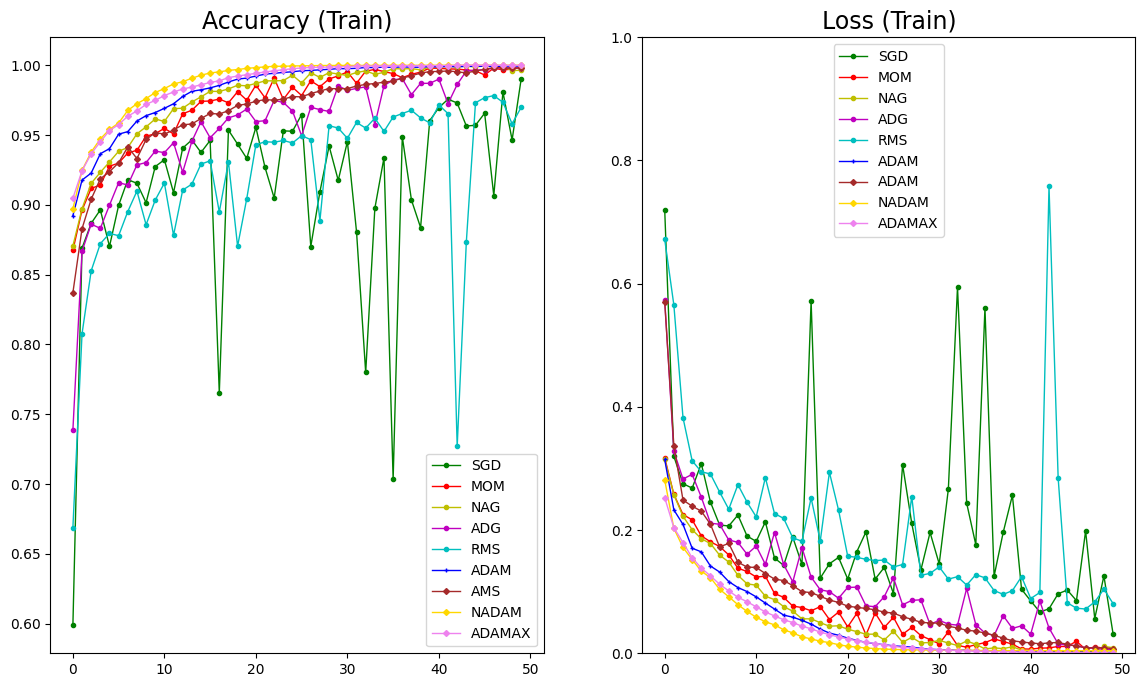

In [17]:
fig, ax = pl.subplots(1,2, figsize=(14,8))

ax[0].plot(A_sgd, 'go-', markersize=3, linewidth=1, label='SGD')
ax[0].plot(A_mom, 'ro-', markersize=3, linewidth=1, label='MOM')
ax[0].plot(A_nag, 'yo-', markersize=3, linewidth=1, label='NAG')
ax[0].plot(A_adg, 'mo-', markersize=3, linewidth=1, label='ADG')
ax[0].plot(A_rms, 'co-', markersize=3, linewidth=1, label='RMS')
ax[0].plot(A_adam, 'b+-', markersize=3, linewidth=1, label='ADAM')
ax[0].plot(A_ams, marker='D', color='brown', markersize=3, linewidth=1, label='AMS')
ax[0].plot(A_nadam, marker='D', color='gold', markersize=3, linewidth=1, label='NADAM')
ax[0].plot(A_adamax, marker='D', color='violet', markersize=3, linewidth=1, label='ADAMAX')
ax[0].set_title("Accuracy (Train)", size=17)
ax[0].legend()

ax[1].plot(L_sgd, 'go-', markersize=3, linewidth=1, label='SGD')
ax[1].plot(L_mom, 'ro-', markersize=3, linewidth=1, label='MOM')
ax[1].plot(L_nag, 'yo-', markersize=3, linewidth=1, label='NAG')
ax[1].plot(L_adg, 'mo-', markersize=3, linewidth=1, label='ADG')
ax[1].plot(L_rms, 'co-', markersize=3, linewidth=1, label='RMS')
ax[1].plot(L_adam, 'b+-', markersize=3, linewidth=1, label='ADAM')
ax[1].plot(L_ams, marker='D', color='brown', markersize=3, linewidth=1, label='ADAM')
ax[1].plot(L_nadam, marker='D', color='gold', markersize=3, linewidth=1, label='NADAM')
ax[1].plot(L_adamax, marker='D', color='violet', markersize=3, linewidth=1, label='ADAMAX')
ax[1].set_title("Loss (Train)", size=17)
ax[1].set_ylim(0,1)
ax[1].legend()

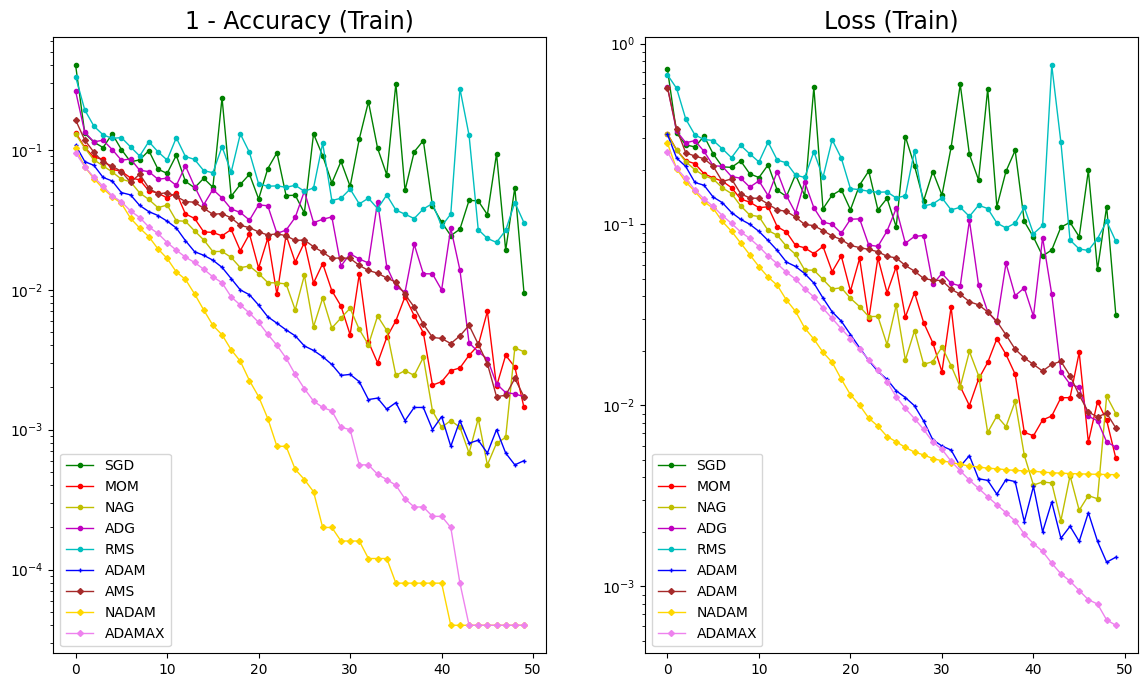

In [18]:
fig, ax = pl.subplots(1,2, figsize=(14,8))

ax[0].plot(1-np.array(A_sgd), 'go-', markersize=3, linewidth=1, label='SGD')
ax[0].plot(1-np.array(A_mom), 'ro-', markersize=3, linewidth=1, label='MOM')
ax[0].plot(1-np.array(A_nag), 'yo-', markersize=3, linewidth=1, label='NAG')
ax[0].plot(1-np.array(A_adg), 'mo-', markersize=3, linewidth=1, label='ADG')
ax[0].plot(1-np.array(A_rms), 'co-', markersize=3, linewidth=1, label='RMS')
ax[0].plot(1-np.array(A_adam), 'b+-', markersize=3, linewidth=1, label='ADAM')
ax[0].plot(1-np.array(A_ams), marker='D', color='brown', markersize=3, linewidth=1, label='AMS')
ax[0].plot(1-np.array(A_nadam), marker='D', color='gold', markersize=3, linewidth=1, label='NADAM')
ax[0].plot(1-np.array(A_adamax), marker='D', color='violet', markersize=3, linewidth=1, label='ADAMAX')
ax[0].set_title("1 - Accuracy (Train)", size=17)
ax[0].set_yscale('log')
ax[0].legend()

ax[1].plot(L_sgd, 'go-', markersize=3, linewidth=1, label='SGD')
ax[1].plot(L_mom, 'ro-', markersize=3, linewidth=1, label='MOM')
ax[1].plot(L_nag, 'yo-', markersize=3, linewidth=1, label='NAG')
ax[1].plot(L_adg, 'mo-', markersize=3, linewidth=1, label='ADG')
ax[1].plot(L_rms, 'co-', markersize=3, linewidth=1, label='RMS')
ax[1].plot(L_adam, 'b+-', markersize=3, linewidth=1, label='ADAM')
ax[1].plot(L_ams, marker='D', color='brown', markersize=3, linewidth=1, label='ADAM')
ax[1].plot(L_nadam, marker='D', color='gold', markersize=3, linewidth=1, label='NADAM')
ax[1].plot(L_adamax, marker='D', color='violet', markersize=3, linewidth=1, label='ADAMAX')
ax[1].set_title("Loss (Train)", size=17)
ax[1].set_yscale('log')
ax[1].legend()

In [19]:
list_test_loss = [lt_sgd, lt_mom, lt_nag, lt_adg, lt_rms, lt_add, lt_adam, lt_ams, lt_nadam, lt_adamax]
list_test_accu = [at_sgd, at_mom, at_nag, at_adg, at_rms, at_add, at_adam, at_ams, at_nadam, at_adamax]
dico = {'Name':list_algo, 'Loss':list_test_loss, 'Accuracy':list_test_accu}
df_mnist = pd.DataFrame(dico)
df_mnist

,Name,Loss,Accuracy
0,SGD,0.333359,0.88260
1,MOM,0.299705,0.87484
2,NAG,0.314320,0.87396
3,ADG,0.286964,0.88064
4,RMS,0.295134,0.88116
5,ADD,0.284140,0.88532
6,ADAM,0.397126,0.86892
7,AMS,0.338815,0.88488
8,NADAM,0.375459,0.86844
9,ADAMAX,0.312963,0.87868
